<img src="../images/immune.jpeg"  width="30%" height="15%">



# 00 - Red Neuronal desde 0

Crearemos una red desde cero con numpy.

**Proceso de funcionamiento:**

+ **1** - Le pasamos los datos a la red.

Todas las capas que creemos tienen al menos 2 cosas en común: una entrada y una salida de datos.

<br>

![forward_1](../images/forward_1.webp)

<br>

+ **2** - Los datos se transforman capa tras capa hasta llegar a la salida de la red.

Hay que remarcar que la salida de una capa es la entrada de la siguiente capa. A este proceso se le conoce como propagación hacia adelante (forward propagation).

<br>

+ **3** - En la salida de la red se calcula el error, un número, comparando la predicción con la verdad (ground truth). Recordemos que es aprendizaje supervisado.

<br>

![forward_2](../images/forward_2.webp)


+ **4** - Ajustamos los pesos, o el sesgo, restando la derivada parcial del error con respecto al propio peso.

<br>

![gradient_desc](../images/gradient_desc.webp)

<br>

Este proceso es conocido como gradiente descendente, básicamente queremos cambiar el valor del peso $\omega$ con el objetivo de minimizar el error de la red con respecto de la verdad. El parámetro $\alpha$ es un parámetro de ajuste llamado tasa de aprendizaje comprendido en el intervalo [0, 1].

Tenemos que repetir esto capa a capa. Supongamos que le damos a una capa la derivada del error con respecto a su salida ($∂E/∂Y$), entonces la capa debe ser capaz de calcular la derivada del error con respecto a su entrada ($∂E/∂X$). A este proceso se le conoce como propagación hacia atrás (backward propagation - backpropagation).



<br>

![backward_prop](../images/backward_prop.webp)

<br>

Recordemos que el error es un número calculado al final de la red, y que tanto $X$ como $Y$ son matrices.

<br>

![backward_prop2](../images/backward_prop2.webp)

<br>

El truco es que teniendo acceso a $∂E/∂Y$ podemos calcular fácilmente $∂E/∂\omega$, si la capa tiene parámetros entrenables, sin conocer siquiera la estructura de la red. Es tan simple como usar la regla de la cadena:

<br>

![backward_prop3](../images/backward_prop3.webp)

<br>

La incógnita es $∂y_{j}/∂w$, que depende de como la capa calcula su salida. Asi que si cada capa acceso a $∂E/∂Y$,
donde $Y$ es su propia salida, entonces podemos actualizar nuestros parámetros. Sin olvidar que la salida de una capa es la entrada de la siguiente, lo que quiere decir que $∂E/∂X$ para una capa es $∂E/∂Y$ para la anterior. Es asi como se propaga el error hacia atrás. De nuevo, por la regla de la cadena:

<br>

![backward_prop4](../images/backward_prop4.webp)

<br>



**Diagrama resumen**

<br>

![backward_prop5](../images/backward_prop5.webp)

<br>



+ **5** - Iteramos el proceso.

## Código de Python 

In [1]:
import numpy as np

from tqdm.notebook import tqdm

In [2]:
# Primero la clase básica de lo que es una capa, el molde

class Layer:
    
    def __init__(self):
        '''
        Todas las capa tienes entrada y salida de datos, método constructor
        '''
        self.input = None
        self.output = None

        
    def forward_propagation(self, input_):
        '''
        Propagación hacia adelante, calcula la salida Y de la capa dada la entrada X
        '''
        pass

    
    def backward_propagation(self, output_error, learning_rate):
        '''
        Propagación hacia atrás, calcula dE/dX dado dE/dY, y actuliza parámetros 
        '''
        pass

### Capa Dense (Full Connected)

Desde código vamos a crear una capa completamente conectada, que recuerda y mucho a una regresión lineal.

<br>

![dense](../images/dense.webp)

<br>

De hecho el forward se reduce a la siguiente ecuación:

<br>

![dense2](../images/dense2.webp)

<br>

y el backward a las tres siguientes:

<br>

![dense3](../images/dense3.webp)

<br>

Lo cuál es el resumen de la minimización por mínimos cuadrados, pues recordemos que nuestra función de pérdida es:

<br>

![dense4](../images/dense4.webp)

<br>

![dense5](../images/dense5.webp)

<br>

In [3]:
# capa completamente conectada

# hereda de la clase base Layer
class Dense(Layer):
    
    def __init__(self, input_size, output_size):
        '''
        input_size = número de neuronas de entrada
        output_size = número de neuronas de salida
        '''
        
        # inicialización aleatoria de parámetros con las dimensiones adecuadas
        self.weights = np.random.rand(input_size, output_size) - 0.5   # pesos, betas 1-n (W)
        self.bias = np.random.rand(1, output_size) - 0.5               # sesgo, ordenada en el origen, beta0 (B)


    def forward_propagation(self, input_data):
        '''
        Dados unos datos de entrada X, devuelve Y = XW+B
        '''
        
        self.input = input_data   # datos de entrada, atributo heredado
        
        self.output = np.dot(self.input, self.weights) + self.bias  # salida Y = XW+B, atributo heredado
        
        return self.output
    


    def backward_propagation(self, output_error, learning_rate):
        '''
        Dados el error de salida (output_error=dE/dY) y la tasa de aprendizaje,
        calcula dE/dX, dE/dW y dE/dB, y devuelve el error de entrada (input_error=dE/dX)
        '''
        
        input_error = np.dot(output_error, self.weights.T)  # dE/dX = dE/dY * W^t
        weights_error = np.dot(self.input.T, output_error)  # dE/dW = X^t * dE/dY
        # dBias = output_error                              # dE/dB = dE/dY

        # update parameters
        self.weights -= learning_rate * weights_error    # W = W - a*dE/dW
        self.bias -= learning_rate * output_error        # B = B - a*dE/dY
        
        return input_error

### Capa de Activación

Todos los calculos realizados hasta ahora son lineales. Debemos añadir no linealidad si queremos que el modelo aprenda mejor y pueda ser utilizado para más propósitos. Tan solo tenemos que añadir la capa de activación con la función de activación deseada y evaluar la función y su derivada:

<br>

![acti1](../images/acti1.webp)

<br>
<br>

![acti2](../images/acti2.webp)

<br>

![acti3](../images/acti3.webp)

<br>



In [4]:
# capa de activación base, valida para cualquier función de activación

# hereda de la clase base Layer
class Activation(Layer):
    
    def __init__(self, activation, activation_prime):
        '''
        activation = función de activación
        activation_prime = derivada de la función de activación
        '''
        
        self.activation = activation
        self.activation_prime = activation_prime


    def forward_propagation(self, input_data):
        '''
        Devuelve la evaluación de la función de activación
        '''
        
        self.input = input_data
        self.output = self.activation(self.input)
        
        return self.output

    
    def backward_propagation(self, output_error, learning_rate):
        '''
        Dado el error de salida (output_error=dE/dY),
        calcula dE/dX, en este caso no se usa la tasa de aprendizaje,
        no hay nada que aprender, solo evaluar.
        '''
        
        return self.activation_prime(self.input) * output_error  # dE/dX

**Ejemplo función de activación**

In [5]:
# tangente hiperbólica
def tanh(x):
    return np.tanh(x)



# derivada de la tangente hiperbólica
def tanh_prime(x):
    return 1 - np.tanh(x)**2

### Función de Pérdida/Coste

Objetivo de la minimización.

<br>

![dense4](../images/dense4.webp)

<br>

![dense5](../images/dense5.webp)

<br>

In [6]:
# función de coste
def mse(y_true, y_pred):
    return np.mean(np.power(y_true-y_pred, 2))



# derivada de la función de coste
def mse_prime(y_true, y_pred):
    return 2*(y_pred-y_true)/y_true.size;

### Clase Red Neuronal


Ya prácticamente tenemos todo el código necesario para construir nuestra red neuronal. El código de la clase Network nos va a permitir añadir capas, usar distintas funciones de coste, entrenar nuestra red y también realizar predicciones.

In [7]:
# clase red neuronal

class Network:
    
    def __init__(self):
        '''
        Se inician los atributos: capas y función de perdida.
        '''
        
        self.layers = []          # lista de capas de la red
        self.loss = None          # función de coste
        self.loss_prime = None    # derivada de la función de coste

        
    
    def add(self, layer):
        '''
        Método para añadir una capa a la red.
        '''
        self.layers.append(layer)

        

    def use(self, loss, loss_prime):
        '''
        Método para establecer la función de coste. Sobreescribe atributos
        '''
        self.loss = loss
        self.loss_prime = loss_prime

        

    def predict(self, input_data):
        '''
        Método para predecir dada una entrada. Evalúa todas las capas.
        Devuelve una lista de predicciones.
        '''
        
        # número de muestras y lista vacía para guardar resultados
        samples = len(input_data)
        result = []

        # para cada muestra, ejecuta la red..
        for i in range(samples):
            
            # forward propagation, se evalúa cada capa
            output = input_data[i]
            
            # para cada capa...
            for layer in self.layers:
                output = layer.forward_propagation(output)
            
            # guarda la prediccion
            result.append(output)

        return result

    

    def fit(self, X_train, y_train, epochs, learning_rate):
        '''
        Método para entrenar la red neuronal.
        Recibe los datos de entrenamiento (X, y), el número de épocas y la tasa de apredizaje.
        No devuelve nada, actualiza los pesos de cada capa de la red.
        '''
        
        # número de muestras
        samples = len(X_train)
        
        print_err = 0   # inicia error a cero, solo para ver
        
        # bucle de entrenamiento, para cada época....
        for i in tqdm(range(epochs), desc='Epochs'):
            
            # para cada muestra de los datos...
            for j in tqdm(range(samples), leave=False, bar_format=f'Loss Value --- {print_err}'):  
                                
                # forward propagation, se evalúa cada capa
                output = X_train[j]
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                    
                
                # backward propagation, se actualizan los pesos de la red llevando el error hacia atrás 
                error = self.loss_prime(y_train[j], output)
                for layer in reversed(self.layers):
                    error = layer.backward_propagation(error, learning_rate)
                    
                
                # calcula la pérdida, solo para ver el error
                print_err = self.loss(y_train[j], output)


# TEST

### Datos Mnist

![mnist](../images/mnist.jpeg)

El MNIST es un conjunto de datos desarrollado por Yann LeCun, Corinna Cortes y Christopher Burges para la evaluación de modelos de aprendizaje de máquinas sobre el problema de la clasificación de los dígitos escritos a mano. La base de datos se construyó a partir de varios conjuntos de datos de documentos escaneados disponibles en la carpeta Instituto Nacional de Estándares y Tecnología (NIST).

Las imágenes de los dígitos fueron tomadas de una variedad de documentos escaneados, normalizados en tamaño y centrado. Esto lo convierte en un excelente conjunto de datos para evaluar modelos, permitiendo al desarrollador centrar el aprendizaje de la máquina con muy poca limpieza de datos. Cada imagen tiene 28 x 28 píxeles cuadrados (784 píxeles en total). Se utiliza una división estándar del conjunto de datos para evaluar y comparar modelos, en la que se utilizan 60.000 imágenes para formar un modelo y un conjunto separado de 10.000 imágenes para probarlo.

Es una tarea de reconocimiento de dígitos. Como tal, hay 10 dígitos (0 a 9) o 10 clases para predecir.

In [8]:
from keras.datasets import mnist
from keras.utils import to_categorical

import pylab as plt

In [9]:
# cargar datos 

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [10]:
# normalizar X_train

X_train = X_train.reshape(X_train.shape[0], 1, 28*28)

X_train = X_train.astype('float32')

X_train /= 255

In [11]:
X_train.shape

(60000, 1, 784)

In [12]:
print('Antes:   ', y_train.shape)

# one-hot para la y, es decir desde intervalo [0,9] a vector de tamaño 10

# e.g. número 3 = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train_onehot = to_categorical(y_train)

print('Despues: ', y_train_onehot.shape)

Antes:    (60000,)
Despues:  (60000, 10)


In [13]:
# lo mismo con el paquete de testeo

X_test = X_test.reshape(X_test.shape[0], 1, 28*28)

X_test = X_test.astype('float32')

X_test /= 255

X_test.shape

(10000, 1, 784)

In [14]:
print('Antes:   ', y_test.shape)

y_test_onehot = to_categorical(y_test)

print('Despues: ', y_test_onehot.shape)

Antes:    (10000,)
Despues:  (10000, 10)


### Construcción de la red

In [15]:
# red de 3 capas

net = Network()                           # inicia una red vacia de capas, y ahora añade...


net.add(Dense(28*28, 100))                # input_shape=(1, 28*28) ; output_shape=(1, 100)
net.add(Activation(tanh, tanh_prime))

net.add(Dense(100, 50))                   # input_shape=(1, 100) ; output_shape=(1, 50)
net.add(Activation(tanh, tanh_prime))

net.add(Dense(50, 10))                    # input_shape=(1, 50) ; output_shape=(1, 10)
net.add(Activation(tanh, tanh_prime))


**Entrenamiento de la red**

In [16]:
# se elige la función de pérdida, error cuadrático medio y su derivada
net.use(mse, mse_prime)

In [17]:
# se entrena el modelo con N datos, 35 épocas y 0.1 de tasa de aprendizaje

N = 5000

net.fit(X_train[0:N], y_train_onehot[0:N], epochs=35, learning_rate=0.1)

Epochs:   0%|          | 0/35 [00:00<?, ?it/s]

Loss Value --- 0

Loss Value --- 0.059002650826063575

Loss Value --- 0.031507287112874774

Loss Value --- 0.009457036169430767

Loss Value --- 0.00739024943104821

Loss Value --- 0.004886156428799387

Loss Value --- 0.0035672326932102553

Loss Value --- 0.0022495546950046675

Loss Value --- 0.0015925725328832265

Loss Value --- 0.0017507207813062871

Loss Value --- 0.002135074366406667

Loss Value --- 0.002314475672938486

Loss Value --- 0.002110614761572584

Loss Value --- 0.001876055194411479

Loss Value --- 0.0017049980025604984

Loss Value --- 0.0014650303032548116

Loss Value --- 0.0014363981166900697

Loss Value --- 0.0012579981218012193

Loss Value --- 0.0012245556246623585

Loss Value --- 0.0012237569011939048

Loss Value --- 0.0012985692312869716

Loss Value --- 0.0013215197016805853

Loss Value --- 0.001153440768549693

Loss Value --- 0.0012573863180832734

Loss Value --- 0.001522879912604223

Loss Value --- 0.0013349424194867311

Loss Value --- 0.0014609941185866732

Loss Value --- 0.0014430065243603515

Loss Value --- 0.0015901410220931192

Loss Value --- 0.001330522303370008

Loss Value --- 0.0017048998211227934

Loss Value --- 0.0012230424618210074

Loss Value --- 0.0014508246641110054

Loss Value --- 0.0013798576843822414

Loss Value --- 0.001208827214118869

**Testeo de la red**

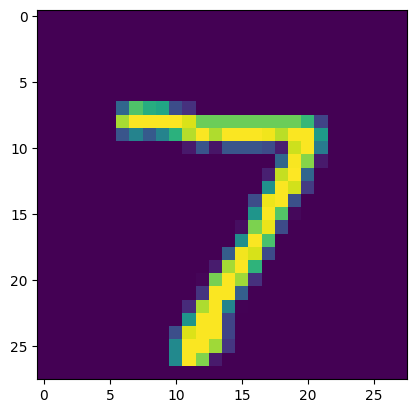

In [18]:
# primera foto del testeo

plt.imshow(X_test[0].reshape((28, 28)));

In [19]:
# etiqueta de la primera foto

y_test[0]

7

In [20]:
# etiqueta de la primera foto, one-hot

y_test_onehot[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
# sacando el indice del valor maximo me da la etiqueta real

np.argmax(y_test_onehot[0])

7

In [22]:
# prediccion de la primera foto ¿? - sale de minimizar un MSE, es continuo

net.predict(X_test[0])[0][0]

array([ 2.50774622e-03,  6.01500892e-03,  4.07701867e-02, -8.28259029e-05,
        5.47914337e-04,  4.33406610e-03, -1.25276657e-02,  9.81772982e-01,
        4.50326339e-02, -6.08564146e-03])

In [23]:
# de nuevo, sacando el indice del valor maximo me da la etiqueta real

pred = net.predict(X_test[0])[0][0]

np.argmax(pred)

7

In [24]:
# predicciones

y_hat = net.predict(X_test)   # salida directa de la red  

y_pred = [np.argmax(e[0]) for e in y_hat]   # etiqueta 

In [25]:
y_hat[0]

array([[ 2.50774622e-03,  6.01500892e-03,  4.07701867e-02,
        -8.28259029e-05,  5.47914337e-04,  4.33406610e-03,
        -1.25276657e-02,  9.81772982e-01,  4.50326339e-02,
        -6.08564146e-03]])

In [26]:
y_pred[0]

7

**Evaluando el modelo**

In [27]:
from sklearn.metrics import accuracy_score as acc

from sklearn.metrics import f1_score as f1

from sklearn.metrics import confusion_matrix as cm

import seaborn as sns

In [28]:
# acierto

acc(y_test, y_pred)

0.9049

In [29]:
# F1 score

f1(y_test, y_pred, average='micro')

0.9049

In [30]:
f1(y_test, y_pred, average='macro')

0.9049876374022843

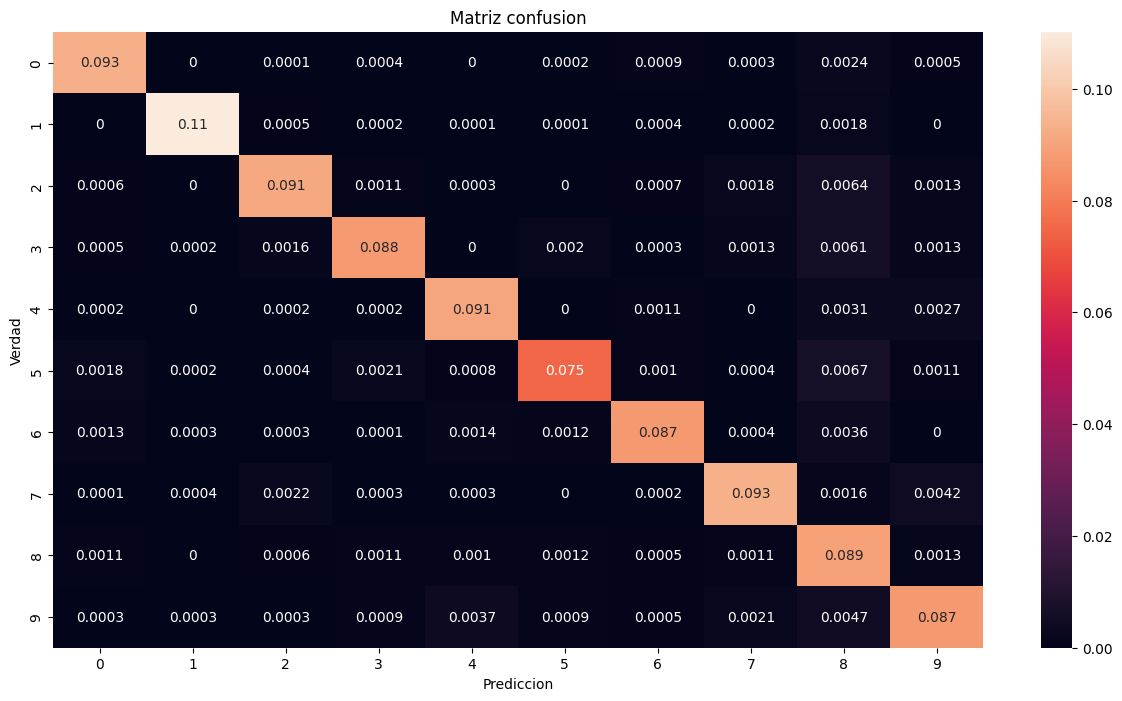

In [33]:
# matriz de confucion

plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred)/cm(y_test, y_pred).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();